In [1]:
config='configuration_OA2024.yaml'
from pythetatools.config import load_config, inputs_dir, outputs_dir
load_config(f"{inputs_dir}/config_files/{config}")
from pythetatools.config import CONFIG

In [2]:
from analysis_scripts import plot_errorbands

from pythetatools.config_visualisation import *
import os
import numpy as np
from matplotlib import pyplot as plt
import uproot
import matplotlib.colors as colors

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.28/04


In [3]:
base_dir = f"{inputs_dir}/{CONFIG.dir_ver}/ErrorBands"
outdir_path = f'{outputs_dir}/plots/{CONFIG.dir_ver}/ErrorBars/'
os.makedirs(outdir_path, exist_ok=True)

__Here you need to set the input directories where your error bands are stored__

In [7]:
#for OA2023
#indir_prebanff = f"{base_dir}/ErrorBands_AsimovOA2023BFNO_Ptheta_Matrix_preBanff_v19_SKJointErrorMatrix_OA2023_V1_mom_Run11_Mirrorfixed" 
#indir_postbanff = f"{base_dir}/ErrorBands_AsimovOA2023BFNO_Ptheta_Matrix_postBanff_v19_SKJointErrorMatrix_OA2023_V1_mom_Run11_Mirrorfixed" 
#indir_postbanff_SKoa2021 = f"{base_dir}/ErrorBands_AsimovOA2023BFNO_Ptheta_Matrix_postBanff_v19_SKJointErrorMatrix_OA2021_V1_mom_Run11_Mirrorfixed"

#for OA2024
#indir_prebanff = f"{base_dir}/ErrorBands_AsimovOA2023BFNO_Ptheta_Matrix_preBanff_v19_SKJointErrorMatrix_OA2023_V1_mom_Run11_Mirrorfixed" 
indir_postbanff = f"{base_dir}/ErrorBands_script_OA2024_main_AsimovA22" 
indir_prebanff = f"{base_dir}/ErrorBands_script_OA2024_preGundam_AsimovA22" 


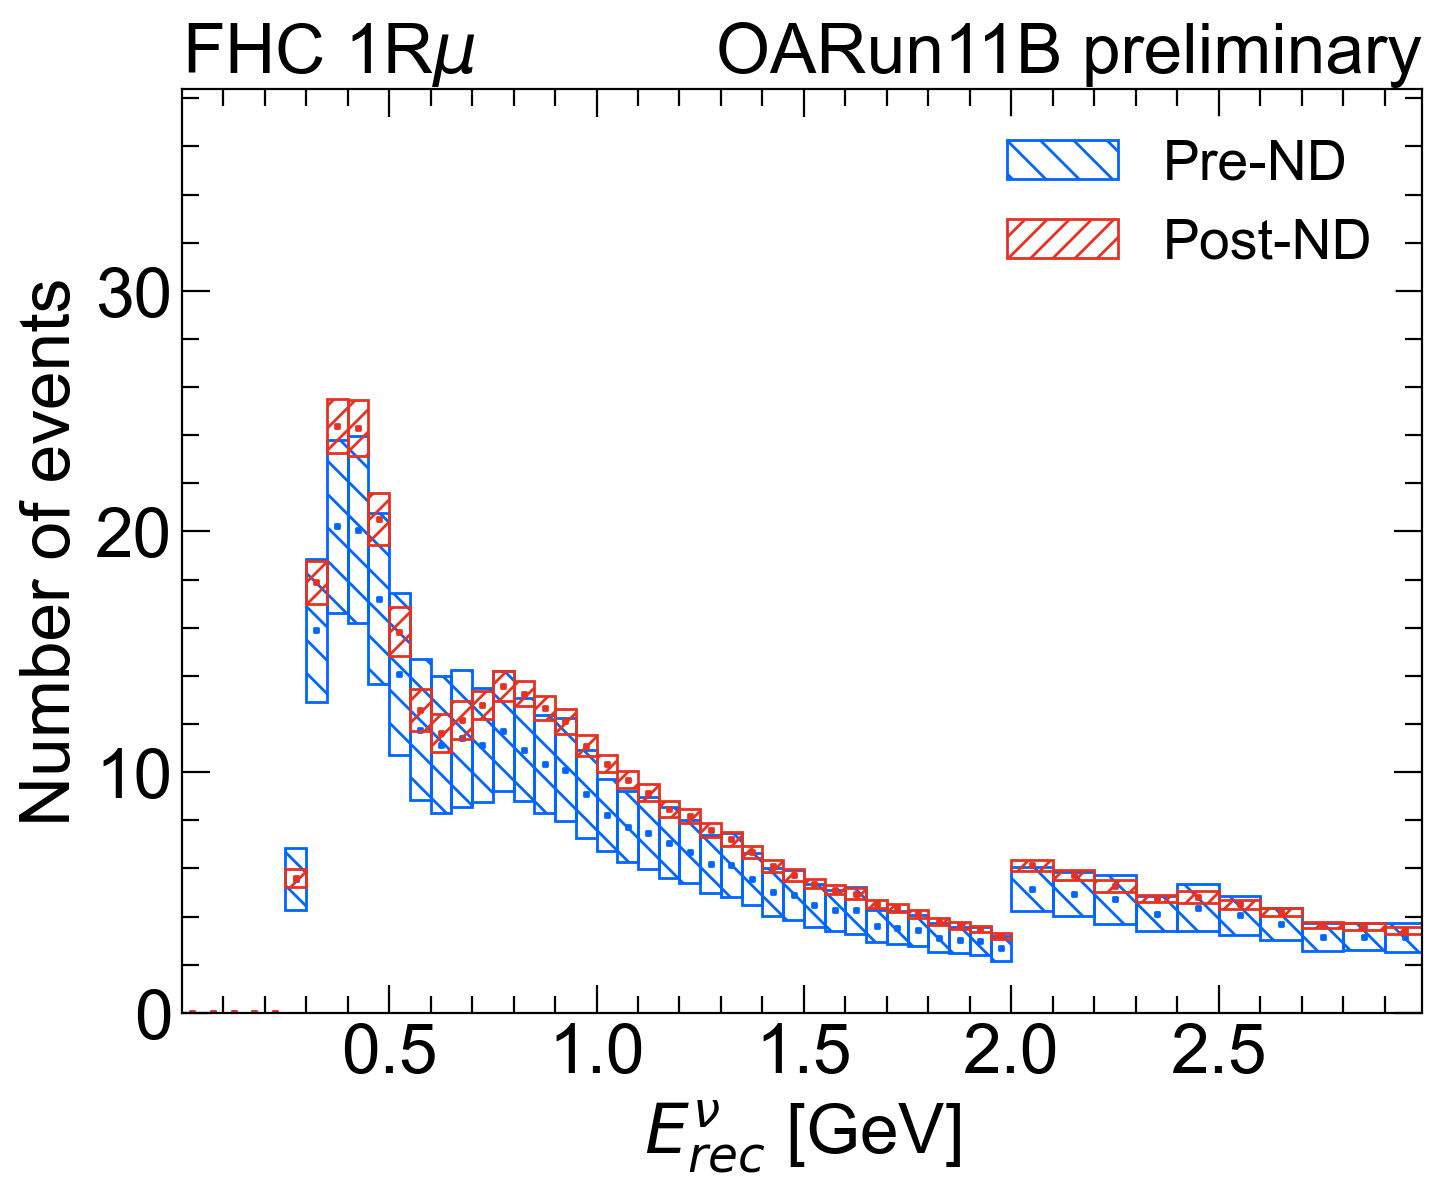

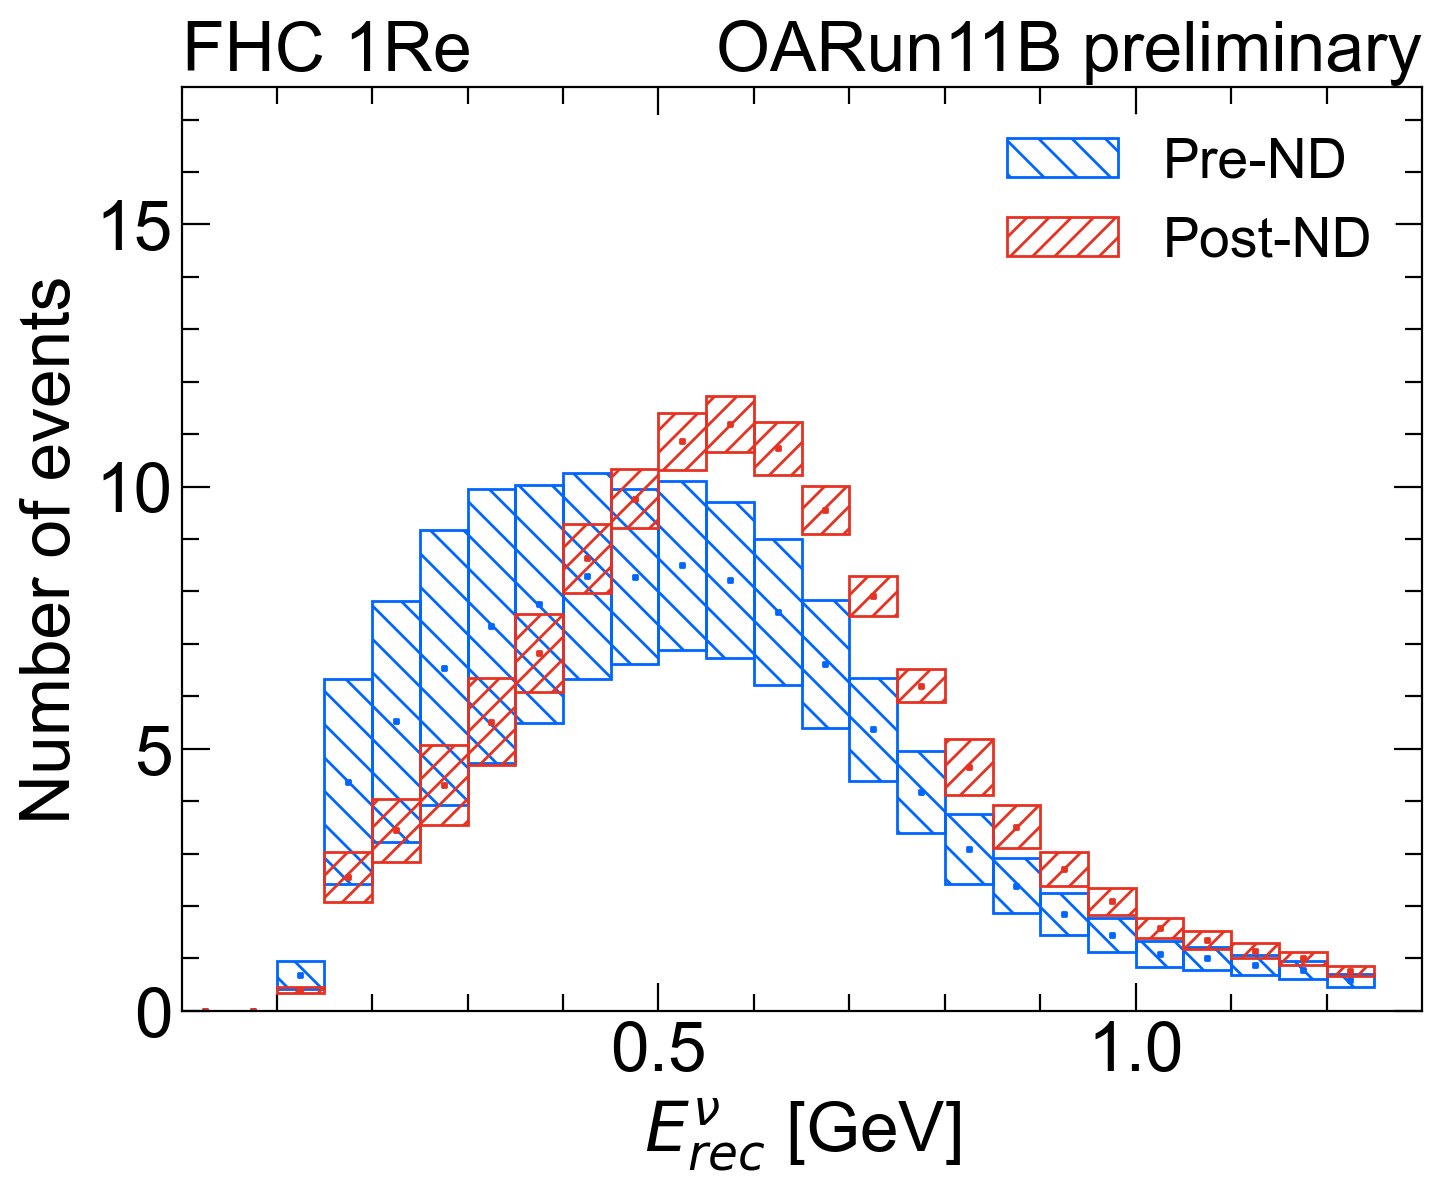

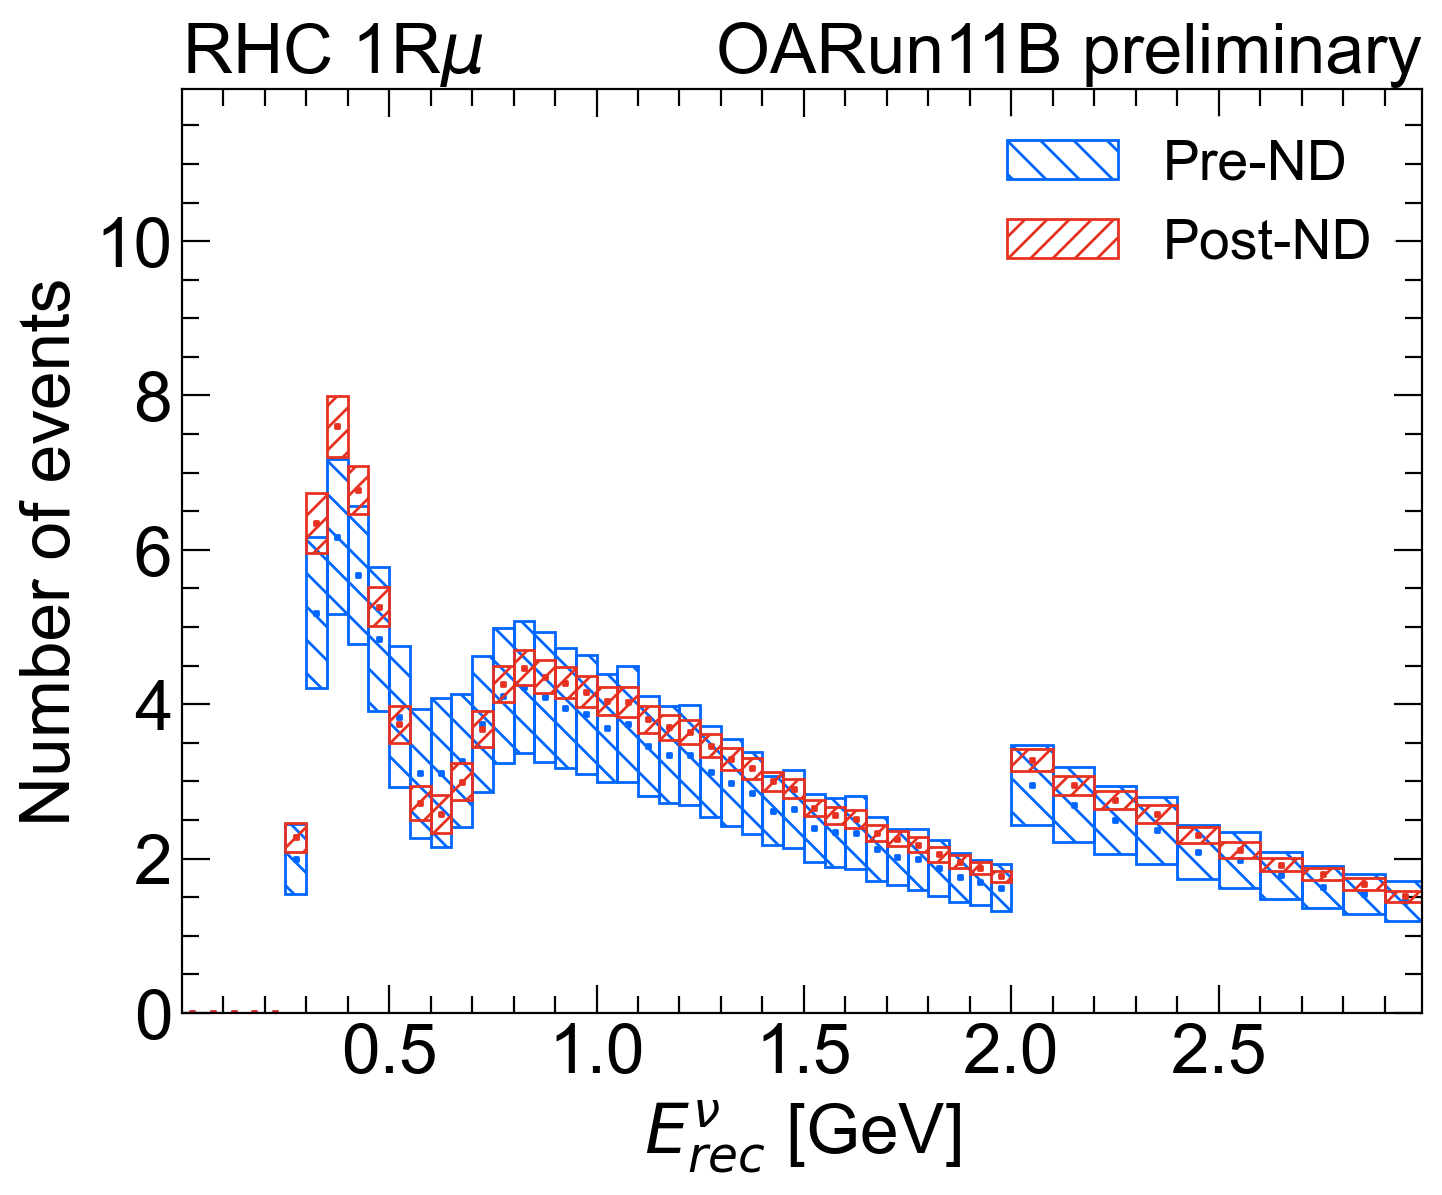

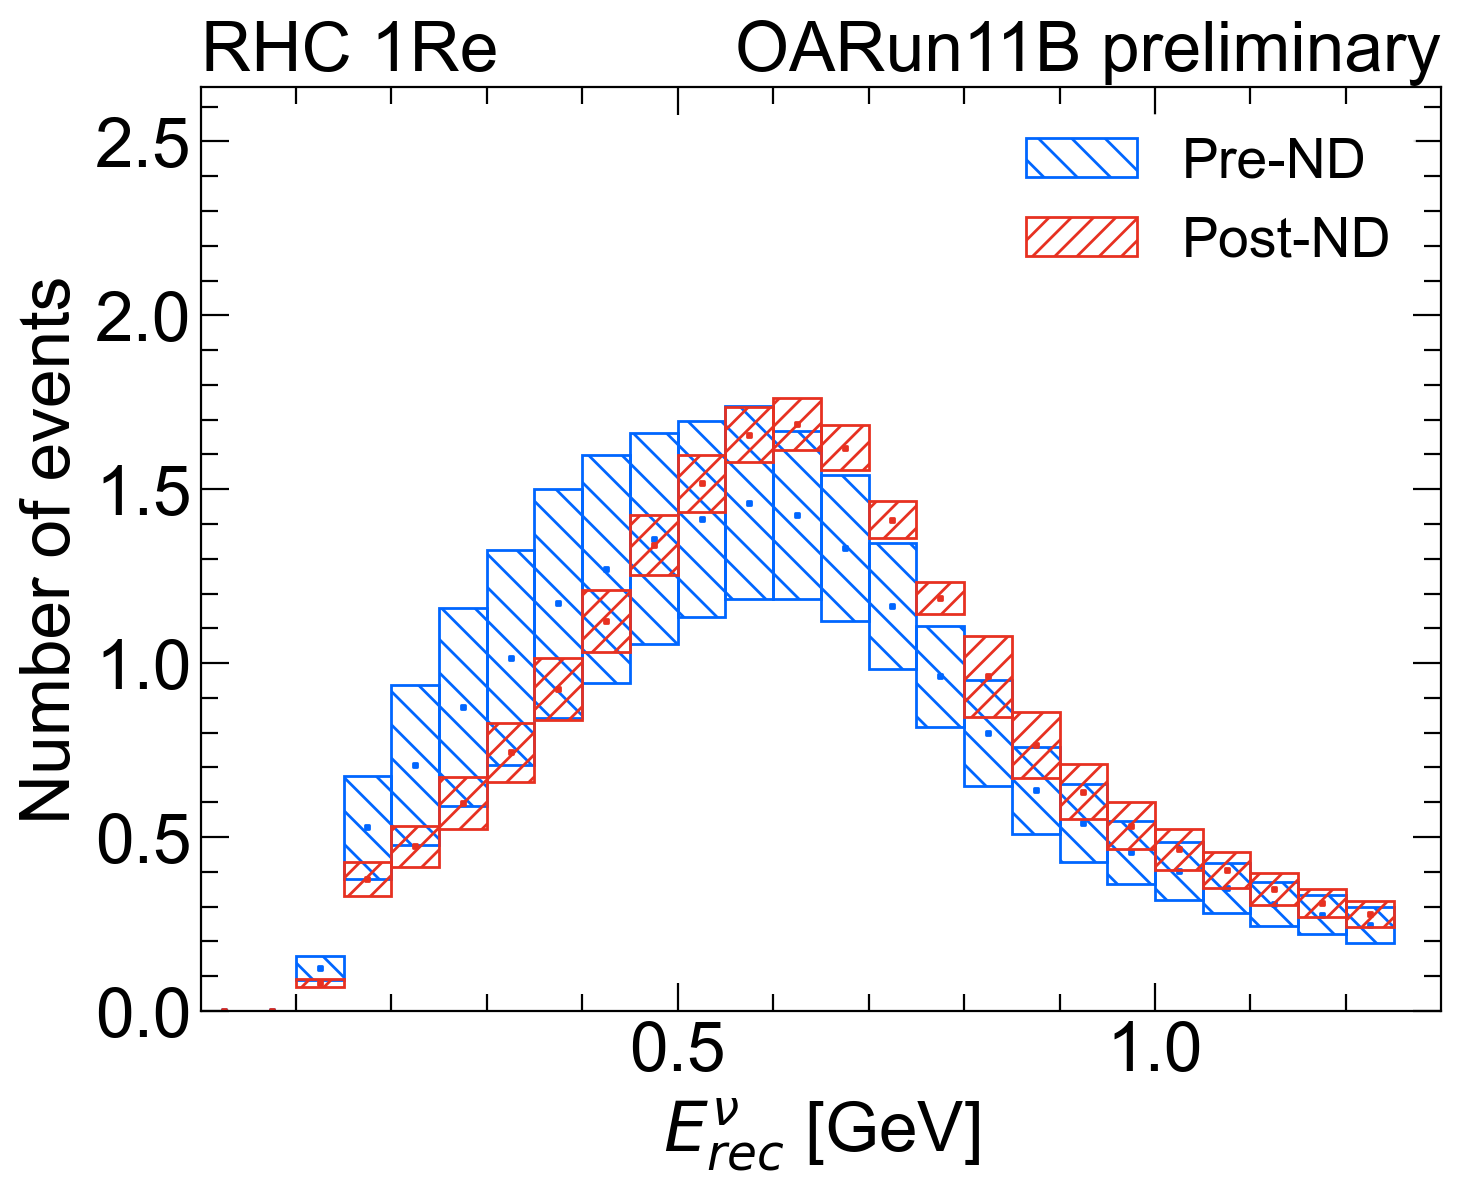

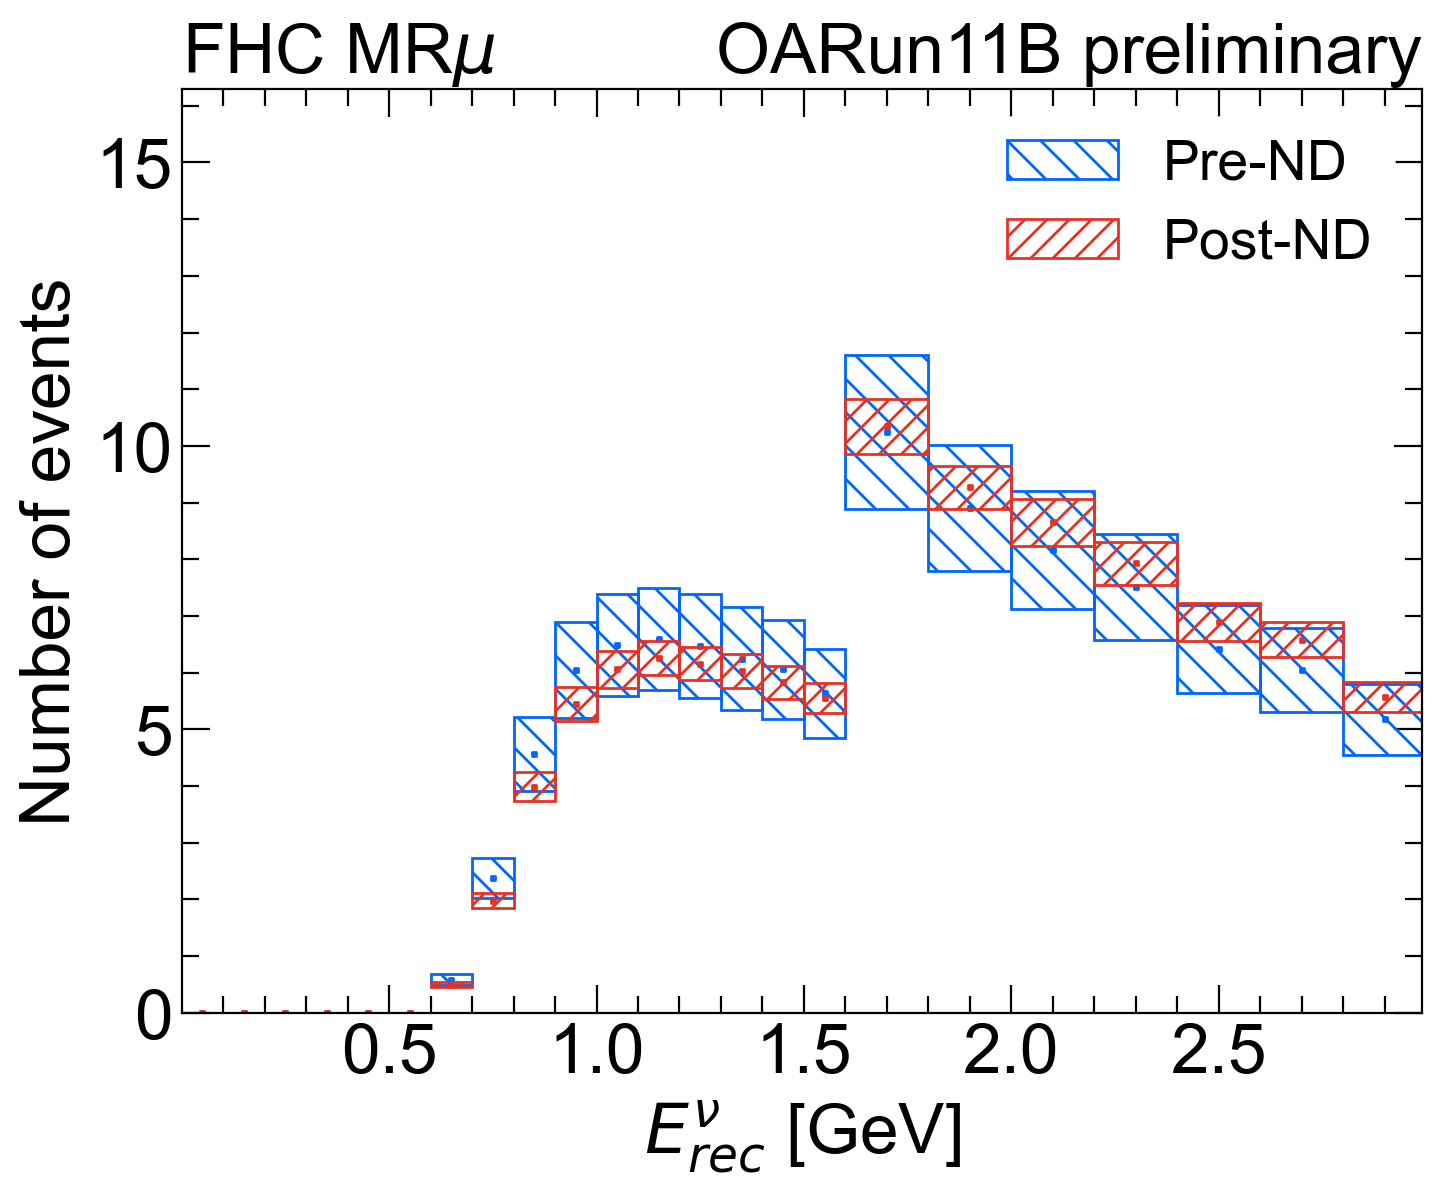

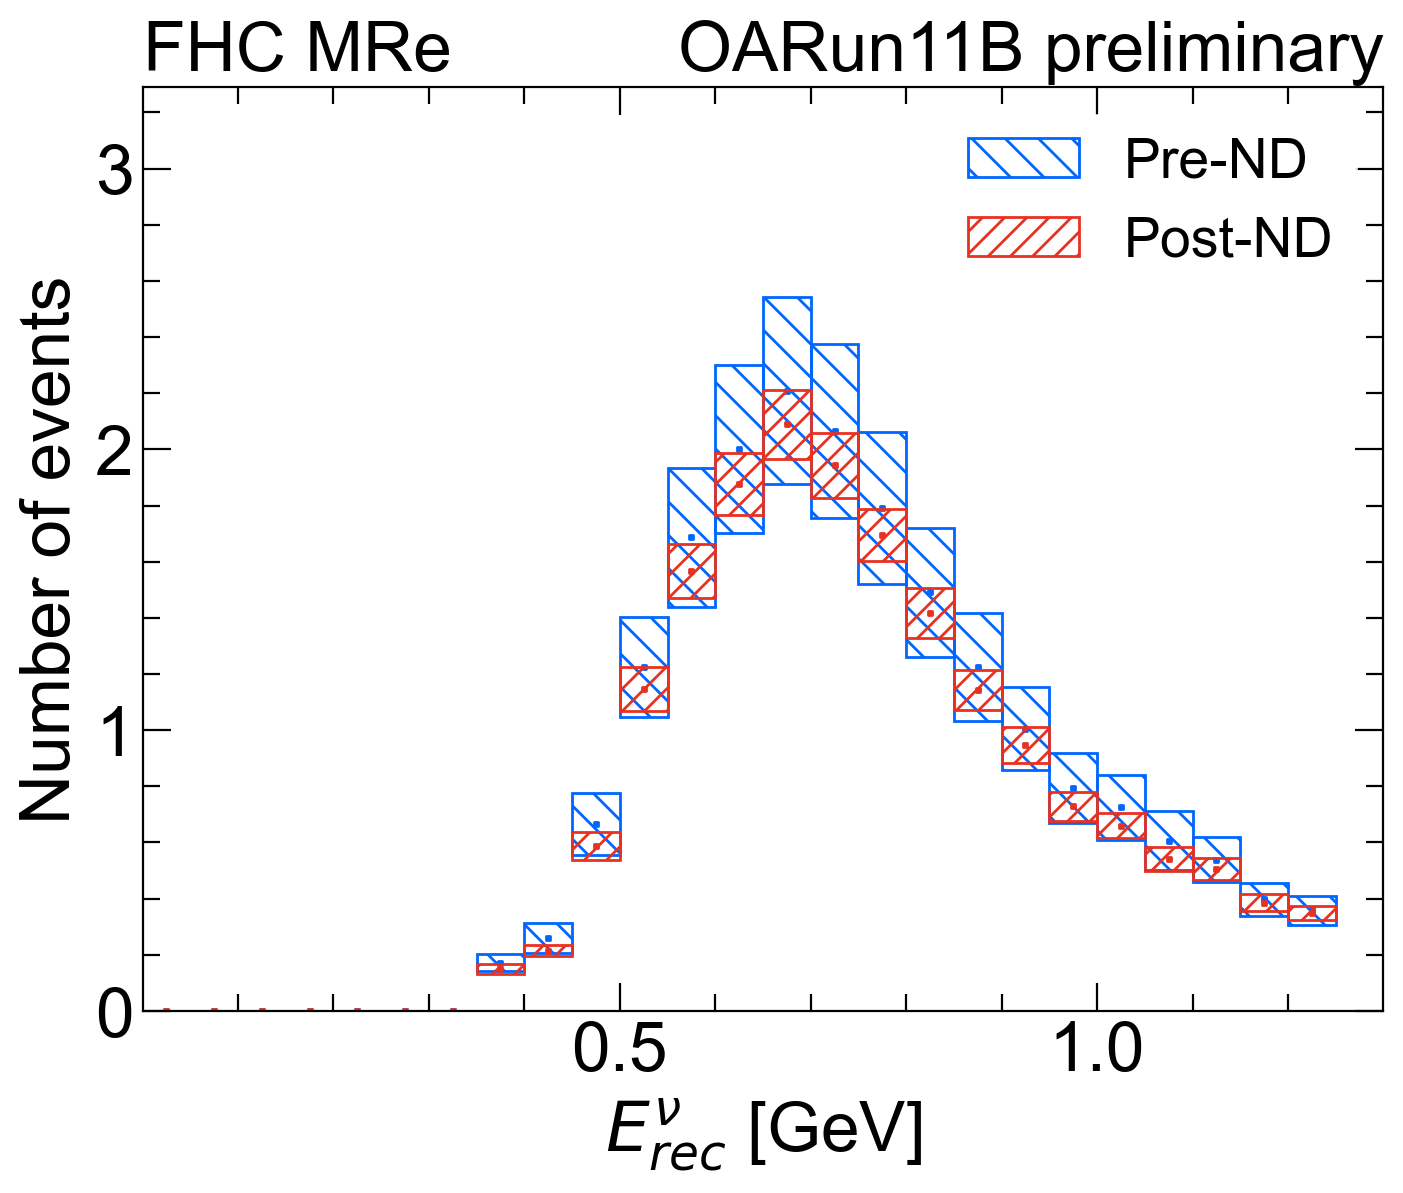

In [8]:
indirs = [indir_prebanff, indir_postbanff]
labels = ['Pre-ND', 'Post-ND']

plot_errorbands.plot_errorbands(indirs, labels, outdir_path, nfiles = 200, save=True)

In [ ]:
group = 'sk'
indirs = [indir_prebanff, indir_postbanff]
labels = [group+'Pre-ND', group+'Post-ND']

plot_errorbands.plot_errorbands(indirs, labels, outdir_path, group=group, nfiles = 200)